# Smoothing and enhacing with OpenCV

TODO: introduce the topic of smoothing and enhancing

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

In [2]:
%matplotlib tk

In [3]:
%matplotlib inline

#### 1. Load the image 'Connector 01.jpg' (`im1`) and add gaussian noise with mean = 0 and standard deviation = 0.001 to generate the image `im2`. Show both images and its histograms.

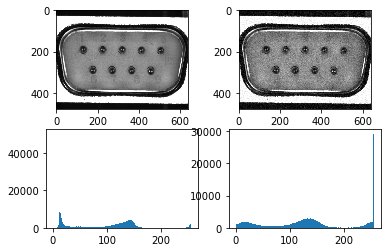

In [4]:
im1 = cv2.imread('../Images/Connector/Connector 01.jpg', 0) 

gauss = np.zeros(im1.shape, np.int8)
gauss = cv2.randn(gauss, 0, 255*0.05);
im2 = cv2.add(im1, gauss, dtype=cv2.CV_8UC3)

plt.figure(0)
plt.subplot(2,2,1), plt.imshow(im1, 'gray')
plt.subplot(2,2,2), plt.imshow(im2, 'gray')
plt.subplot(2,2,3), plt.hist(im1.ravel(), 256, [0,256]);
plt.subplot(2,2,4), plt.hist(im2.ravel(), 256, [0,256]);
plt.show()

Gaussian noise smooths the histogram

#### 2. Load the image 'fuse 02.tif' (`im3`) and add gaussian and salt & pepper noise to obtain the images `im4` and `im5`.

In [5]:
def add_snp_noise(img, thr=101):
    # http://blog.kyleingraham.com/salt-pepper-noise-and-median-filters-part-ii-the-code/
    img_noisy = np.copy(img)
    noise = np.random.randint(thr, size=img_noisy.shape)
    img_noisy = np.where(noise==0, 0, img_noisy)
    img_noisy = np.where(noise==1, 255, img_noisy)
    return img_noisy

In [6]:
def add_gauss_noise(img, mean=0, std=0.05):
    # http://nullege.com/codes/search/cv2.randn
    noise = np.zeros(img.shape, np.int8)
    noise = cv2.randn(noise, 0, 255*0.05);
    img_noisy = cv2.add(img, noise, dtype=cv2.CV_8UC3)
    return img_noisy

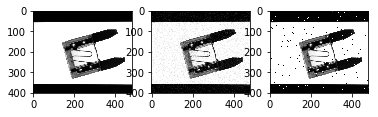

In [7]:
im3 = cv2.imread('../Images/Fuse/Fuse 02.tif', 0) 

im4 = add_gauss_noise(im3)
im5 = add_snp_noise(im3)

plt.figure(1)
plt.subplot(1,3,1), plt.imshow(im3, 'gray')
plt.subplot(1,3,2), plt.imshow(im4, 'gray')
plt.subplot(1,3,3), plt.imshow(im5, 'gray')
plt.show()

#### 3. 

#### 4.

#### 5. Apply a gaussian filter to the image `im4` with shape (11, 11) and compare the result to the application of an average filter of the same shape.

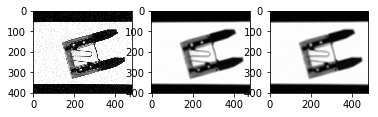

In [8]:
im10 = cv2.GaussianBlur(im4, (11,11), 5) # Gaussian filter
im11 = cv2.blur(im4, (11, 11)) # Average filter

plt.figure(3)
plt.subplot(1,3,1), plt.imshow(im4, 'gray')
plt.subplot(1,3,2), plt.imshow(im10, 'gray')
plt.subplot(1,3,3), plt.imshow(im11, 'gray')
plt.show()

#### 6. Apply a median filter to the images `im4` and `im5` and show the results (`im12` and `im13`)

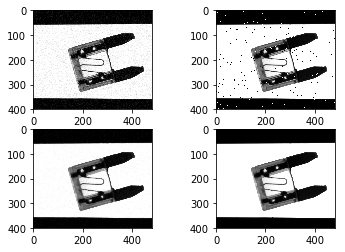

In [9]:
im12 = cv2.medianBlur(im4, 5)
im13 = cv2.medianBlur(im5, 5)

plt.figure(4)
plt.subplot(2,2,1), plt.imshow(im4, 'gray')
plt.subplot(2,2,2), plt.imshow(im5, 'gray')
plt.subplot(2,2,3), plt.imshow(im12, 'gray')
plt.subplot(2,2,4), plt.imshow(im13, 'gray')
plt.show()

#### 7. Load the image 'Fuse 23.tif' (`im14`) and show it along with its Fourier transform spectrum.

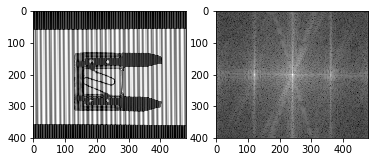

In [10]:
im14 = cv2.imread('../Images/Fuse/Fuse 23.tif', 0)

im14_fft = np.fft.fft2(im14)
im14_fft_c = np.fft.fftshift(im14_fft)
im14_esp_c = 20*np.log(np.abs(im14_fft_c))

plt.figure(5)
plt.subplot(1,2,1), plt.imshow(im14, 'gray')
plt.subplot(1,2,2), plt.imshow(im14_esp_c, 'gray')
plt.show()

#### 8. Build an ideal low-pass filter (ILPF) with `d0 = 100` and a Butterworth low-pass filter (BLPF) with `d0 = 50` and `n = 1` so we can atenuate the frequencies corresponding to the noise of the image `im14`.  Show the two filters in a figure.

In [11]:
d0 = 100
tamx, tamy = im14.shape
xx, yy = np.meshgrid(np.arange(1, tamx+1), np.arange(1, tamy+1))
d = np.sqrt((xx-tamx/2)**2+(yy-tamy/2)**2)
ILPF = (d < d0).T.astype(np.int8)

In [12]:
d0 = 50
n = 1
tamx, tamy = im14.shape
xx, yy = np.meshgrid(np.arange(1, tamx+1), np.arange(1, tamy+1))
d = np.sqrt((xx-tamx/2)**2+(yy-tamy/2)**2)
BLPF = (1/(1+(d/d0)**(2*n))).T

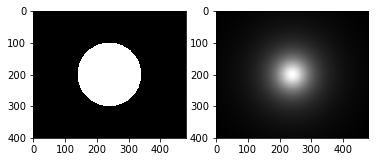

In [13]:
plt.figure(6)
plt.subplot(1,2,1), plt.imshow(ILPF, 'gray')
plt.subplot(1,2,2), plt.imshow(BLPF, 'gray')
plt.show()

#### 9. Apply both filters to the image `im14` and show in a figure the image `im14`, the results of applying each filter and its corresponding Fourier transform spectrums.

/home/solano/anaconda3/envs/opencv/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


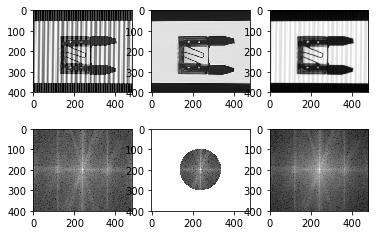

In [14]:
im15_fft_c = im14_fft_c * ILPF
im16_fft_c = im14_fft_c * BLPF

im15 = np.abs(np.fft.ifft2(np.fft.fftshift(im15_fft_c)))
im16 = np.abs(np.fft.ifft2(np.fft.fftshift(im16_fft_c)))

im15_esp_c = 20*np.log(np.abs(im15_fft_c))
im16_esp_c = 20*np.log(np.abs(im16_fft_c))

plt.figure(7)
plt.subplot(2,3,1), plt.imshow(im14, 'gray')
plt.subplot(2,3,2), plt.imshow(im15, 'gray')
plt.subplot(2,3,3), plt.imshow(im16, 'gray')
plt.subplot(2,3,4), plt.imshow(im14_esp_c, 'gray')
plt.subplot(2,3,5), plt.imshow(im15_esp_c, 'gray')
plt.subplot(2,3,6), plt.imshow(im16_esp_c, 'gray')
plt.show()

#### 10. Load the images 'Meter/Image00.jpg' and 'Meter/Image06.jpg' (`im17` and `im18`) and show them along with their histrograms.

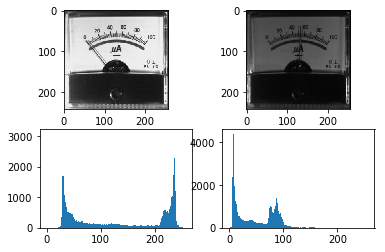

In [15]:
im17 = cv2.imread('../Images/Meter/Image00.jpg', 0)
im18 = cv2.imread('../Images/Meter/Image06.jpg', 0)

plt.figure(8)
plt.subplot(2,2,1), plt.imshow(im17, 'gray')
plt.subplot(2,2,2), plt.imshow(im18, 'gray')
plt.subplot(2,2,3), plt.hist(im17.ravel(), 256, [0,256]);
plt.subplot(2,2,4), plt.hist(im18.ravel(), 256, [0,256]);
plt.show()

#### 11. Build a LUT for histogram equalization (`lut_eq`) using the histogram of the image `im18`.

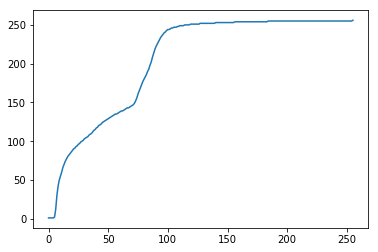

In [16]:
num_pixels = im18.shape[0]*im18.shape[1]
weights = np.ones_like(im18.ravel())/num_pixels

hist, bins = np.histogram(im18.ravel(), 256, [0,256], weights=weights)
cdf = hist.cumsum()

lut_eq = np.ceil(255*cdf)

plt.plot(lut_eq)
plt.show()

#### 12. Apply the function `lut_eq` to the image `im18` to obtain an image with its histogram equalized.

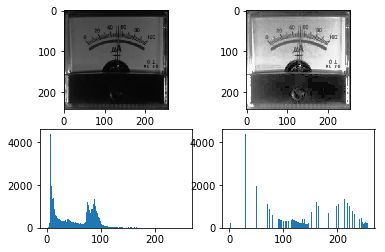

In [17]:
im19 = lut_eq[im18]

plt.figure(9)
plt.subplot(2,2,1), plt.imshow(im18, 'gray')
plt.subplot(2,2,2), plt.imshow(im19, 'gray')
plt.subplot(2,2,3), plt.hist(im18.ravel(), 256, [0,256]);
plt.subplot(2,2,4), plt.hist(im19.ravel(), 256, [0,256]);
plt.show()

#### 13. Check if the result is the same as when applying the method `cv2.equalizeHist()`

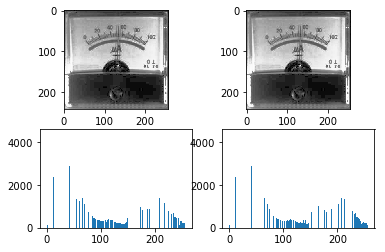

In [18]:
im19_prime = cv2.equalizeHist(im18)

plt.figure(10)
plt.subplot(2,2,1), plt.imshow(im19, 'gray')
plt.subplot(2,2,2), plt.imshow(im19_prime, 'gray')
plt.subplot(2,2,3), plt.hist(im19.ravel(), 256, [0,256]);
plt.subplot(2,2,4), plt.hist(im19_prime.ravel(), 256, [0,256]);
plt.show()

#### 14.

#### 15.